# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, recall_score
from sklearn import tree

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
pd.set_option('max_column', None)

In [3]:
df = pd.read_csv('ExtraaLearn.csv')
df

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [4]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Observations
- All data point contains unique ID.
- Age, website_visits, time_spent_on_website and page_views_per_visit contains continous values.
- Others are categorical variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations
- There is no missing value in all the columns.

In [6]:
# Removing 'ID' column
df.drop('ID', axis=1, inplace=True)
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [7]:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [8]:
df.describe(include='object')

,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
count,4612,4612,4612,4612,4612,4612,4612,4612,4612
unique,3,2,3,3,2,2,2,2,2
top,Professional,Website,High,Email Activity,No,No,No,No,No
freq,2616,2542,2264,2278,4115,4379,4085,3907,4519


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [9]:
num_vars = ['age','website_visits', 'time_spent_on_website', 'page_views_per_visit']
cat_vars = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 
           'print_media_type2', 'digital_media', 'educational_channels', 'referral']
target = ['status']

In [10]:
df_status_0 = df[df['status'] == 0]
df_status_1 = df[df['status'] == 1]

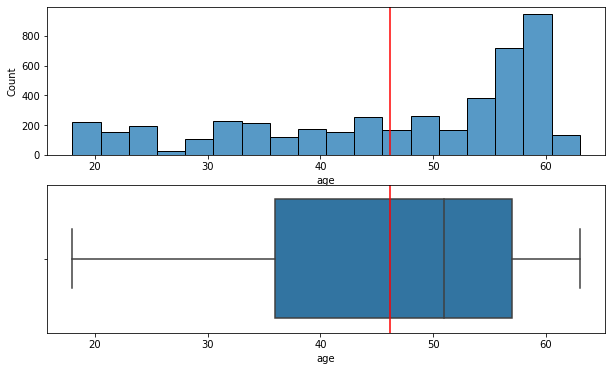

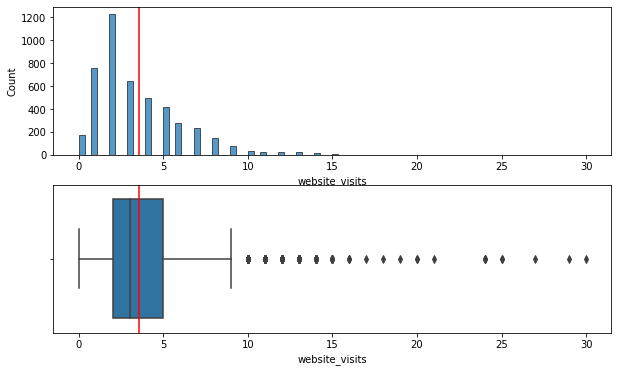

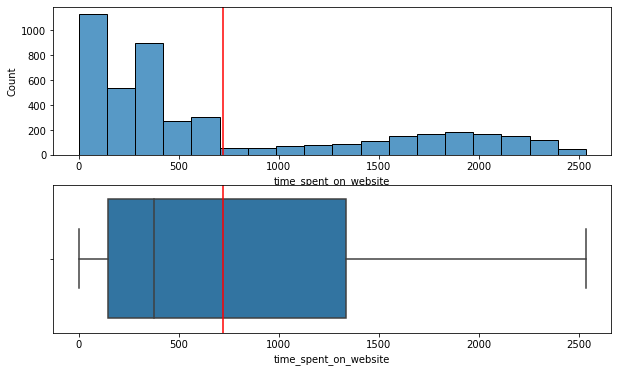

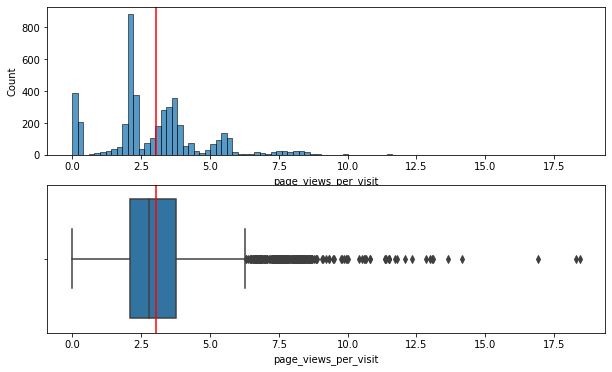

In [11]:
### univariate analysis of numerical variables
# the red line indicates the mean
for i in num_vars:
    fig = plt.figure(figsize=(10,6))
    fig.set_facecolor('white')
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    sns.histplot(data=df, x=i, ax=ax1)
    sns.boxplot(data=df, x=i, ax=ax2)
    ax1.axvline(df[i].mean(), color='red')
    ax2.axvline(df[i].mean(), color='red')

In [12]:
### Univariate analysis of categorical variables

print(df[target].value_counts(normalize=True))
print()

for i in cat_vars:
    print(df[i].value_counts(normalize=True))
    print()


status
0         0.701431
1         0.298569
dtype: float64

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64

Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64

High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64

Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64

No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64

No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64

No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64

No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64

No     0.979835
Yes    0.020165
Name: referral, dtype: float64



In [13]:
### Multivariate analysis of numerical variables
# Mean of numerical variables grouped by status

df.groupby(['status'])[num_vars].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


Observations
- Leads who finally paid (status 1) spent almost double time on website than those who didn't pay (status 0).
- However, no significant differences between status 0 and 1 are observed in age, website visits and page views per visit.

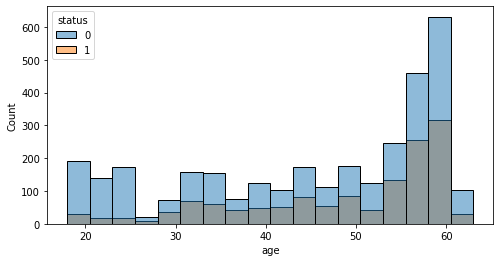

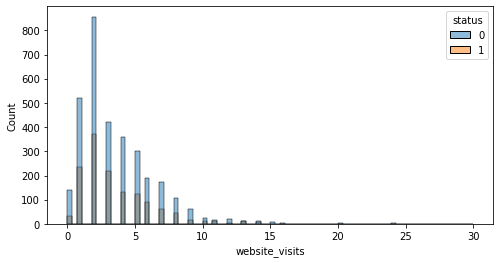

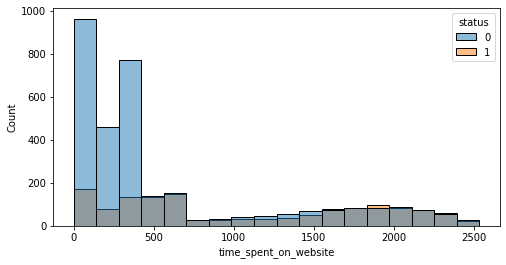

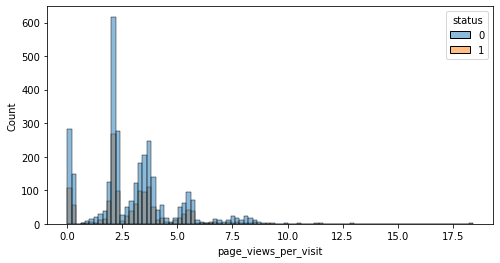

In [14]:
# Distributions of numerical variables grouped by status

for i in num_vars:
    plt.figure(figsize=(8,4), facecolor='white')
    sns.histplot(data=df, x=i, hue='status', legend=True, hue_order=[0,1])


Observations
- The distribution pattern in converted and non-converted leads are similar in age, website visits and page views per visit.
- For non-converted leads, there is a much larger proportion that spent less than 500 seconds on website in comparison with converted leads.

<AxesSubplot:>

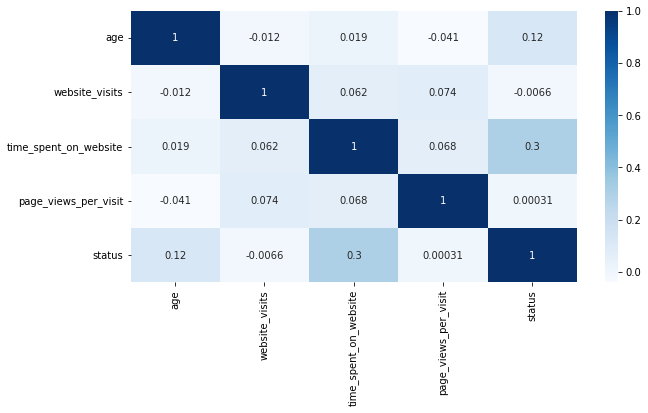

In [15]:
# Correlation between numerical variables

plt.figure(figsize=(10,5), facecolor='white')
sns.heatmap(df.corr(), cmap='Blues', annot=True)

Observations
- All numerical variables have low correlation with each other. Therefore, there is low risk of collinearity.

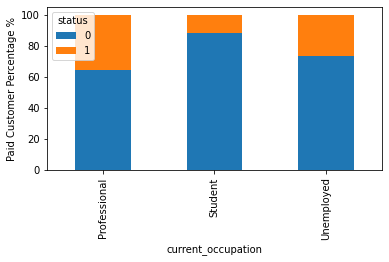

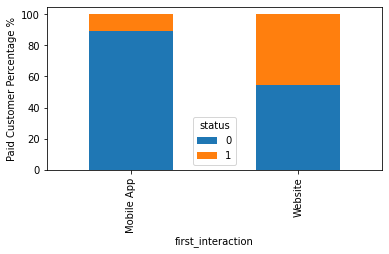

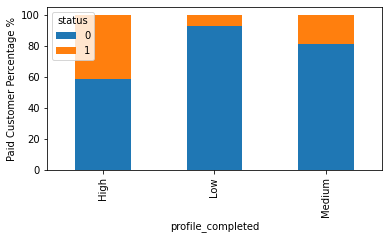

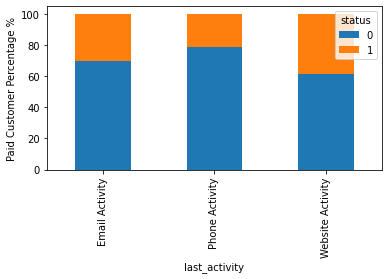

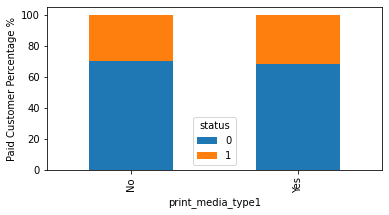

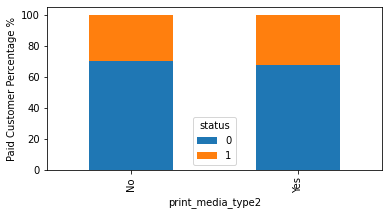

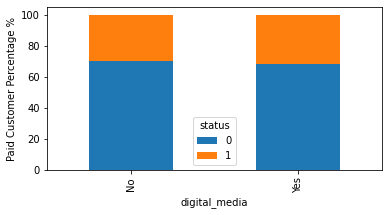

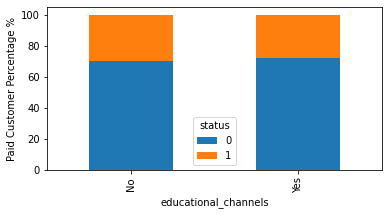

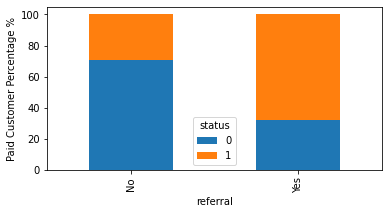

In [16]:
for i in cat_vars:
    crosstab = pd.crosstab(df[i], df['status'], normalize='index')*100
    fig, ax = plt.subplots(facecolor='white')
    crosstab.plot(kind='bar', figsize=(6,3), stacked=True, ax=ax)
    plt.ylabel('Paid Customer Percentage %')

Observations
- There is no obvious difference in the proportion of status 1 grouped by 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels'.
- Current occupation as professional has the highest rate of paid customer, at about 40%. It is followed by the unemployed. Students has the least conversion rate to paid customer.
- Leads whose first interaction is via website have higher conversion rate (approximately 45%) than those via mobile app (about 10%).
- The more profile is completed, the higher the conversion rate. 
- Leads whose last activity is website have the highest conversion rate at 40%. Those with email and phone activity present 30% and 20% conversion rate, respectively.
- Referred leads has a ~65% conversion rate, which is much higher than those without reference (30%).

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [17]:
# Dropping the following columns because there is no obvious difference between status 0 and 1 in these columns.

df = df.drop(['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', ], axis=1)
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,0
...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,No,0


In [18]:
# Replacing 'No' and 'Yes' with 0 and 1
# Replacing 'Mobile App' and 'Website' with 0 and 1 in the first activity column
# One-hot encoding for non-ordinal categorical variables
# Label encoding for ordinal categorical variables

df = df.replace({'No': 0, 'Yes': 1}) 
df = df.replace({'Mobile App': 0, 'Website': 1})
df = pd.get_dummies(data=df, columns=['current_occupation', 'last_activity'])
df['profile_completed'] = df['profile_completed'].replace({'Low': 1, 'Medium': 2, 'High': 3})

df.head()

,age,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,referral,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity
0,57,1,3,7,1639,1.861,0,1,0,0,1,0,0,1
1,56,0,2,2,83,0.320,0,0,1,0,0,0,0,1
2,52,1,2,3,330,0.074,0,0,1,0,0,0,0,1
3,53,1,3,4,464,2.057,0,1,0,0,1,0,0,1
4,23,1,3,4,600,16.914,0,0,0,1,0,1,0,0


In [19]:
X = df.drop('status', axis=1)
Y = df['status']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [21]:
# scaling the data for outlier management

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

- The recall is the most important metrics for us because we want to find and nurture these leads and tries to convert them to paid customers.
- There are only few disadvantages if we wrongly classify those who will actually not pay into the paid group (ie. status 1), such as fruitless call or email.

## Building a Decision Tree model

In [22]:
# Building a decision tree model
# Classes were weighted inversely by the frequency

tree = DecisionTreeClassifier(class_weight = {0: 1-df[target].value_counts(normalize=True)[0], 1: df[target].value_counts(normalize=True)[0]}, random_state=97)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.29856895056374677,
                                     1: 0.7014310494362532},
                       random_state=97)

In [23]:
print('Decision Tree Performance of Training Data:\n\n', classification_report(Y_train, tree.predict(X_train)))
print('*'*100)
print('Decision Tree Performance of Testing Data:\n\n', classification_report(Y_test, tree.predict(X_test)))

Decision Tree Performance of Training Data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689

****************************************************************************************************
Decision Tree Performance of Testing Data:

               precision    recall  f1-score   support

           0       0.86      0.86      0.86       647
           1       0.67      0.68      0.68       276

    accuracy                           0.80       923
   macro avg       0.77      0.77      0.77       923
weighted avg       0.80      0.80      0.80       923



Observations

- The decision tree model showed a recall score of 1.00 for status 1 based on the training data but 0.68 on the testing data, indicating overfitting.

## Do we need to prune the tree?

In [24]:
# Using GridSearchCV to tune the hyperparameter to reduce overfitting (increase recall score on testing data)

tree_estimator = DecisionTreeClassifier(class_weight = {0: 1-df[target].value_counts(normalize=True)[0], 1: df[target].value_counts(normalize=True)[0]}, random_state=98)
params_tree = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': np.arange(1,8),
               'min_samples_leaf': np.arange(1, 21)}

scorer = metrics.make_scorer(metrics.recall_score, pos_label = 1)

GSCV_tree = GridSearchCV(estimator=tree_estimator, param_grid=params_tree, scoring=scorer, cv=10)
GSCV_tree = GSCV_tree.fit(X_train, Y_train)

tree_tuned = GSCV_tree.best_estimator_
tree_tuned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.29856895056374677,
                                     1: 0.7014310494362532},
                       criterion='entropy', max_depth=3, random_state=98)

In [25]:
print('Decision Tree Performance of Training Data After Hyperparameter Tuning:\n\n', classification_report(Y_train, tree_tuned.predict(X_train)))
print('*'*100)
print('Decision Tree Performance of Testing Data After Hyperparameter Tuning:\n\n', classification_report(Y_test, tree_tuned.predict(X_test)))

Decision Tree Performance of Training Data After Hyperparameter Tuning:

               precision    recall  f1-score   support

           0       0.94      0.76      0.84      2588
           1       0.61      0.89      0.73      1101

    accuracy                           0.80      3689
   macro avg       0.78      0.83      0.78      3689
weighted avg       0.85      0.80      0.81      3689

****************************************************************************************************
Decision Tree Performance of Testing Data After Hyperparameter Tuning:

               precision    recall  f1-score   support

           0       0.94      0.74      0.83       647
           1       0.59      0.90      0.72       276

    accuracy                           0.79       923
   macro avg       0.77      0.82      0.77       923
weighted avg       0.84      0.79      0.80       923



Observations

- The tuned decision tree model showed a reduced recall score of 0.89 for status 1 based on the training data but an imporved recall of 0.90 on the testing data. The overfitting was resolved.

<AxesSubplot:xlabel='Importance'>

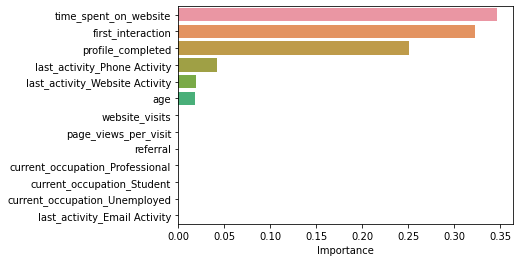

In [26]:
# Plot the feature importances

importances = tree_tuned.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (6, 4), facecolor='white')
sns.barplot(x=importance_df['Importance'], y=importance_df.index)

Observations

- According to the tuned decision tree model, time spent on website, first interaction method and profile completed are the most important features to predict whether a lead will finally pay.
- Phone and website as the last activity and age have minor importance.
- Other features shows no importance in prediction.

## Building a Random Forest model

In [27]:
# Building a random forest model
# Classes were weighted inversely by the frequency
rf = RandomForestClassifier(class_weight = {0: 1-df[target].value_counts(normalize=True)[0], 1: df[target].value_counts(normalize=True)[0]}, random_state=99)
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.29856895056374677,
                                     1: 0.7014310494362532},
                       random_state=99)

In [28]:
print('Random Forest Performance of Training Data:\n\n', classification_report(Y_train, rf.predict(X_train)))
print('*'*100)
print('Random Forest Performance of Testing Data:\n\n', classification_report(Y_test, rf.predict(X_test)))

Random Forest Performance of Training Data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689

****************************************************************************************************
Random Forest Performance of Testing Data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.89       647
           1       0.77      0.66      0.71       276

    accuracy                           0.84       923
   macro avg       0.82      0.79      0.80       923
weighted avg       0.83      0.84      0.83       923



Observations
- The random forest model showed a recall score of 1.00 for status 1 based on the training data but 0.66 on the testing data, indicating considerable overfitting.

## Do we need to prune the tree?

In [29]:
# Using GridSearchCV to tune the hyperparameter to reduce overfitting (increase recall score on testing data)

rf_estimator = RandomForestClassifier(class_weight = {0: 1-df[target].value_counts(normalize=True)[0], 1: df[target].value_counts(normalize=True)[0]}, random_state=100)
params_rf = {'n_estimators': [100, 150, 200],
             'min_samples_leaf': np.arange(1, 4, 1),
             'max_features': np.arange(0.3, 1.0, 0.2)}

scorer = metrics.make_scorer(metrics.recall_score, pos_label = 1)

GSCV_rf = GridSearchCV(estimator=rf_estimator, param_grid=params_rf, scoring=scorer, cv=10)
GSCV_rf = GSCV_rf.fit(X_train, Y_train)

rf_tuned = GSCV_rf.best_estimator_
rf_tuned.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.29856895056374677,
                                     1: 0.7014310494362532},
                       max_features=0.3, min_samples_leaf=3, n_estimators=150,
                       random_state=100)

In [30]:
print('Random Forest Performance of Training Data after Hyperparameter Tuning:\n\n', classification_report(Y_train, rf_tuned.predict(X_train)))
print('*'*100)
print('Random Forest Performance of Testing Data after Hyperparameter Tuning:\n\n', classification_report(Y_test, rf_tuned.predict(X_test)))

Random Forest Performance of Training Data after Hyperparameter Tuning:

               precision    recall  f1-score   support

           0       0.96      0.93      0.95      2588
           1       0.85      0.92      0.88      1101

    accuracy                           0.93      3689
   macro avg       0.91      0.93      0.92      3689
weighted avg       0.93      0.93      0.93      3689

****************************************************************************************************
Random Forest Performance of Testing Data after Hyperparameter Tuning:

               precision    recall  f1-score   support

           0       0.90      0.88      0.89       647
           1       0.73      0.76      0.75       276

    accuracy                           0.85       923
   macro avg       0.81      0.82      0.82       923
weighted avg       0.85      0.85      0.85       923



Observations
- The tuned random forest model showed a reduced recall score of 0.92 for status 1 based on the training data but an imporved recall of 0.76 on the testing data. The overfitting was mitigated but still exist.

<AxesSubplot:xlabel='Importance'>

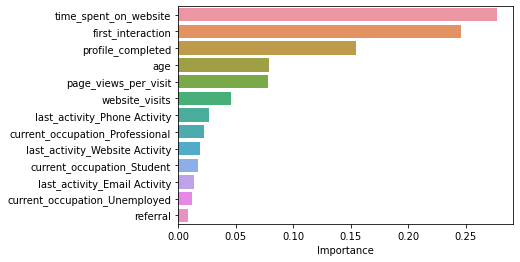

In [31]:
# Plot the feature importances

importances = rf_tuned.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (6, 4), facecolor='white')
sns.barplot(x=importance_df['Importance'], y=importance_df.index)

Obsevations
- The feature importance plot shows that time spent on website is the most important feature, followed by profile completed, first interaction website and first interaction mobile app.
- Other important features include age and page views per visit.

Conclusions
- The tuned decision tree model seems to perform better than the tuned random forest model, since the recall of the former is 0.90, higher than the one of the latter at 0.76.

## Actionable Insights and Recommendations

1. Based on both the tuned decision tree model and tunred random forest model, time spent on website is the most important feature to predict whether leads will be converted to paid customers. The more time the leads spent on the website, the more likely they would be converted the paid customers. The startup may try to retain the leads on the website longer with more course detail or interactive Q&A.
2. Both the models revealed the second most important feature is first interaction method. If the leads first interacted with the startup via website rather than mobile app, they are much more likely to pay. The company could invest more on social media and website advertising to encourage the leads to click into the website.
3. The third most important features that both the models suggested is profile completed. The higher proportion of the profile is completed, the more likely the lead will pay. The organization could encourage the leads to fill in the profile more completely by providing discounts or lottery opportunity. 
4. However, the causal relationship between these features and whether the leads pay or not requires further investigation because direct manipulation of these variables not necessorily results in the corresponding effect on the leads' status. It is possible that other confounding factors, such as the leads' personal level of interest, may be the real determinant of the features and the final status.
